In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

**Mounting File**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Extracting Zip File

In [ ]:
#Extracting zip file
import os,zipfile,cv2
file = zipfile.ZipFile('/content/drive/MyDrive/self-built-masked-face-recognition-dataset.zip')
file.extractall('.')
masked_file = zipfile.ZipFile('/content/drive/MyDrive/Real-World-Masked-Face-Dataset-master.zip')
masked_file.extractall('.')

In [ ]:
# iterating through each folder 
import numpy as np
data= []
label = []
for i in os.listdir('/content/self-built-masked-face-recognition-dataset/AFDB_face_dataset'):
        image_path = '/content/self-built-masked-face-recognition-dataset/AFDB_face_dataset/'+i
        for j in os.listdir(image_path):
            image = cv2.imread(image_path+'/'+j)
            data.append(cv2.resize(image,(100,100)))
            label.append(0)


for i in os.listdir('/content/self-built-masked-face-recognition-dataset/AFDB_masked_face_dataset'):
        image_path = '/content/self-built-masked-face-recognition-dataset/AFDB_masked_face_dataset/'+i
        for j in os.listdir(image_path):
            image = cv2.imread(image_path+'/'+j)
            data.append(cv2.resize(image,(100,100)))
            label.append(1)
data = np.array(data).reshape(-1,100*100*3)
label = np.array(label).reshape(-1,1)


In [ ]:
data.shape,label.shape


((92671, 30000), (92671, 1))

Spliiting The Data For Test And Train

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.50)

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.50)

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.50)

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.50)

In [ ]:
X_train.shape

(5791, 30000)

**Reducing Features**

In [ ]:

pca = PCA(n_components = 2)
X_train_pca = pca.fit_transform(X_train)

In [ ]:
X_test_pca = pca.transform(X_test)

**Descision Tree Classifer**

In [ ]:

clf_dtc_1 = DecisionTreeClassifier()
clf_dtc_1 = clf_dtc_1.fit(X_train, y_train)

In [ ]:
y_pred = clf_dtc_1.predict(X_test)

In [ ]:

accuracy_score(y_test, y_pred)

0.9696132596685083

In [ ]:
cvs_DTC = cross_val_score(clf_dtc_1, X_train, y_train, cv=5)


**Descision tree Classsifier (Reduced Features)**

In [ ]:

clf_dtc_2 = DecisionTreeClassifier()
clf_dtc_2 = clf_dtc_2.fit(X_train_pca, y_train)

In [ ]:
y_pred = clf_dtc_2.predict(X_test_pca)

In [ ]:

accuracy_score(y_test, y_pred)

0.9547651933701657

In [ ]:
cvs_DTC_pca = cross_val_score(clf_dtc_2, X_train_pca, y_train, cv=5)


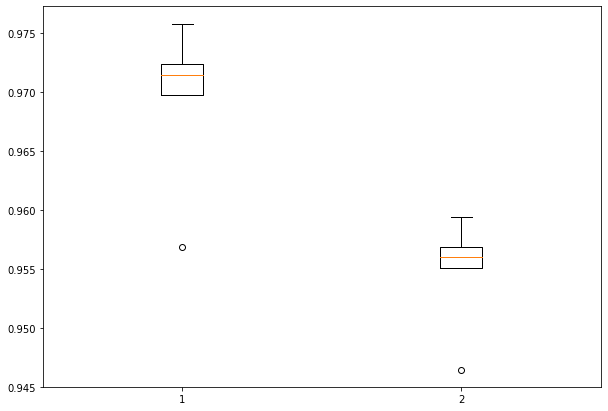

In [ ]:
data_SVC = [cvs_DTC, cvs_DTC_pca]
fig_SVC = plt.figure(figsize =(10, 7))
plt.boxplot(data_SVC)
plt.show()

**MLP**

In [ ]:
clf_MLP_1 = MLPClassifier(random_state=1, max_iter=10).fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
clf_MLP_1.score(X_test, y_test)

0.9849792817679558

In [ ]:
cvs_MLP = cross_val_score(clf_MLP_1, X_train, y_train, cv=5)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization

**MLP(Reduced Features)**

In [ ]:
clf_MLP_2 = MLPClassifier(random_state=1, max_iter=10).fit(X_train_pca, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
clf_MLP_2.score(X_test_pca, y_test)

0.9649516574585635

In [ ]:
cvs_MLP_pca = cross_val_score(clf_MLP_2, X_train_pca, y_train, cv=5)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization

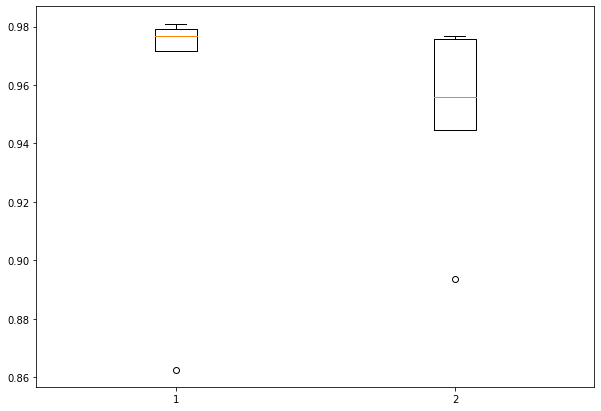

In [ ]:
data_SVC = [cvs_MLP, cvs_MLP_pca]
fig_SVC = plt.figure(figsize =(10, 7))
plt.boxplot(data_SVC)
plt.show()

**Logistic Regression**

In [ ]:
clf_LR_1 = LogisticRegression(random_state=0).fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
clf_LR_1.score(X_test, y_test)

0.988950276243094

In [ ]:
cvs_LR = cross_val_score(clf_LR_1, X_train, y_train, cv=5)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

**Logistic Regression (Reduced Features)**


In [ ]:
clf_LR_2 = LogisticRegression(random_state=0).fit(X_train_pca, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
clf_LR_2.score(X_test_pca, y_test)

0.9760013812154696

In [ ]:
cvs_LR_pca = cross_val_score(clf_LR_2, X_train_pca, y_train, cv=5)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

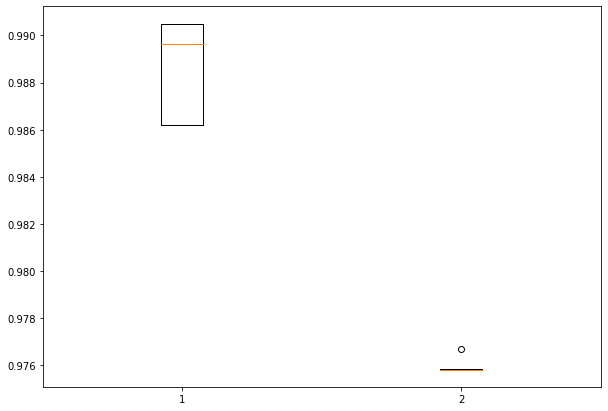

In [ ]:

data_SVC = [cvs_LR, cvs_LR_pca]
fig_SVC = plt.figure(figsize =(10, 7))
plt.boxplot(data_SVC)
plt.show()